<a href="https://colab.research.google.com/github/XTMay/Python_Beginner/blob/main/Notebook/AI%E5%B7%A5%E5%85%B7%E5%9C%A8%E4%BE%9B%E5%BA%94%E9%93%BE%E7%AE%A1%E7%90%86%E4%B8%AD%E7%9A%84%E5%BA%94%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI工具在供应链管理中的应用 - 体验课程

## 自我介绍

### 🧑‍🏫 May

- 9+年系统开发工程师 🇨🇳🇯🇵🇺🇸
- ClimbAI Lab 讲师
- 3+年教学经验
- 强调理论 + 实践
- 认知科学AI研究

## 🧑‍🎓 关于你
- 报名课程目的，想学习的内容
- 编程经验，工具使用，常用AI工具
- 对AI的了解，如机器学习（Machine Learning），深度学习（Deep Learning），自然语言处理（NLP），大语言模型（LLM）等
- 通过课程最终想实现的目标

## 环境准备

首先安装必要的库并设置API密钥：

In [ ]:
# 安装必要的库
!pip install anthropic pandas numpy matplotlib seaborn

import anthropic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置Claude API
client = anthropic.Anthropic(
    api_key=""  # 请替换为你的API密钥
)

print("环境设置完成！")


## 第一部分：Prompt Engineering基础

### 概念介绍

**Prompt Engineering** 是与AI模型有效沟通的艺术和科学。在供应链管理中，好的prompt能让AI准确理解你的需求并给出专业的回答。


### 核心原则

1. **角色定位** - 让AI扮演合适的专家角色
2. **任务明确** - 清楚说明要完成什么任务
3. **上下文丰富** - 提供足够的背景信息
4. **输出结构** - 指定期望的回答格式

### 实战对比：不同Prompt的效果差异

In [63]:
def call_claude(prompt, max_tokens=1000):
    """调用Claude API"""
    try:
        message = client.messages.create(
            model="claude-3-5-sonnet-20241022",
            max_tokens=max_tokens,
            messages=[{"role": "user", "content": prompt}]
        )
        return message.content[0].text
    except Exception as e:
        return f"错误: {str(e)}"

In [64]:
# 示例邮件内容
sample_email = """
Subject: Urgent - Copper Price Increase Notice

Dear Josie,

Hope this email finds you well. Due to the recent surge in global copper prices and supply chain disruptions, we regret to inform you that we need to implement a price adjustment of 8% for all copper-related materials, effective from November 1st, 2024.

This decision was not made lightly, and we've absorbed cost increases for the past six months. However, the current market conditions make this adjustment necessary to maintain our service quality and business sustainability.

We value our long-term partnership and are open to discussing alternative arrangements or volume-based discounts for future orders.

Please let us know your thoughts and how you'd like to proceed.

Best regards,
Mike Chen
ABC Copper Solutions
"""

In [65]:
print("邮件内容准备完成，接下来我们将演示不同Prompt的效果")

邮件内容准备完成，接下来我们将演示不同Prompt的效果


#### 演示1：基础Prompt vs 专业Prompt

In [66]:
# 基础Prompt - 模糊且缺乏专业性
basic_prompt = f"分析这封邮件：\n\n{sample_email}"

# 专业Prompt - 角色明确，任务具体
professional_prompt = f"""
你是一位经验丰富的供应链经理，请分析以下供应商邮件。

邮件内容：
{sample_email}

请从以下角度进行专业分析：
1. 关键信息提取（价格、时间、原因）
2. 供应商策略分析
3. 对我方业务的影响评估
4. 建议的应对措施
5. 谈判要点识别

请用结构化的方式呈现分析结果。
"""

In [67]:
print("=== 基础Prompt结果 ===")
basic_result = call_claude(basic_prompt)
print(basic_result)

=== 基础Prompt结果 ===
我来分析这封邮件的关键要素：

主要内容：
- 这是一封价格调整通知邮件,通知铜材料价格将上调8%
- 调价原因是全球铜价上涨和供应链中断
- 新价格将从2024年11月1日开始生效

写作特点：
1. 语气专业而委婉：
- 开头友好("Hope this email finds you well")
- 用"regret to inform"表示歉意
- 强调这是经过慎重考虑的决定

2. 合理性解释：
- 提到公司已经承担了6个月的成本上涨
- 解释这是为了维持服务质量和业务可持续性

3. 灵活性处理：
- 表示愿意讨论其他方案
- 提供批量订单折扣的可能性

4. 专业格式：
- 清晰的主题行标明紧急性和内容
- 规范的商务信函格式
- 完整的签名信息

沟通策略：
- 提前通知给予客户准备时间
- 保持透明度解释涨价原因
- 展现灵活性维护客户关系
- 为进一步沟通留有余地

这是一封措辞专业、态度得当的商务涨价通知。


In [68]:
print("\n" + "="*50)
print("=== 专业Prompt结果 ===")
professional_result = call_claude(professional_prompt)
print(professional_result)


=== 专业Prompt结果 ===
作为供应链经理，我针对这封邮件进行如下分析：

1. 关键信息提取
- 涨价幅度：8%
- 生效时间：2024年11月1日
- 涨价原因：
  * 全球铜价上涨
  * 供应链中断
  * 供应商已承担6个月成本上涨

2. 供应商策略分析
- 时机选择：提前通知，给予缓冲期
- 沟通方式：
  * 强调不得已性
  * 展现诚意（提及已吸收6个月成本）
  * 保持谈判空间（提出替代方案可能）
- 策略意图：通过volume discount暗示希望锁定更多订单

3. 业务影响评估
- 直接影响：
  * 原材料成本上升
  * 产品毛利率下降
- 潜在影响：
  * 可能需要调整产品定价
  * 可能影响市场竞争力
  * 现有合同执行成本增加

4. 建议应对措施
短期措施：
- 立即评估库存状况
- 在涨价前提前备货
- 检查现有合同中的价格调整条款

中长期措施：
- 开发备选供应商
- 评估替代材料可能性
- 优化产品设计减少铜材使用
- 考虑与客户协商调价

5. 谈判要点识别
关键议题：
- 涨价幅度的合理性证明
- 实施时间表的灵活性
- 阶梯式价格方案
- 长期供货保障

谈判筹码：
- 历史采购量
- 付款条件优化
- 最低采购承诺换取价格优惠
- 寻求更长的价格锁定期

建议谈判策略：
1. 要求提供详细的成本分析数据
2. 提出分步调价方案
3. 以增加采购量为条件争取更优惠的价格
4. 商讨库存优化方案降低总成本

整体建议：
采取积极但务实的应对方式，在认可市场变化的同时，通过多维度谈判争取最优条件，同时加快供应链优化以增强风险应对能力。


#### 演示2：不同输出格式的对比

In [69]:
# JSON格式输出Prompt
json_prompt = f"""
作为供应链专家，请分析以下邮件并以JSON格式输出结果：

邮件内容：
{sample_email}

请返回JSON格式，包含以下字段：
{{
    "summary": "邮件摘要",
    "key_points": {{
        "price_change": "价格变动信息",
        "effective_date": "生效日期",
        "reason": "涨价原因"
    }},
    "impact_level": "影响等级(高/中/低)",
    "recommended_actions": ["行动建议1", "行动建议2", "..."],
    "negotiation_points": ["谈判要点1", "谈判要点2", "..."]
}}
"""

In [70]:
print("=== JSON格式输出 ===")
json_result = call_claude(json_prompt)
print(json_result)

# 尝试解析JSON结果
try:
    parsed_result = json.loads(json_result)
    print("\n=== 解析后的结构化数据 ===")
    for key, value in parsed_result.items():
        print(f"{key}: {value}")
except:
    print("JSON格式解析失败，但输出已经很结构化了")

=== JSON格式输出 ===
{
    "summary": "ABC Copper Solutions通知铜材相关产品价格上调8%",
    "key_points": {
        "price_change": "上涨8%",
        "effective_date": "2024年11月1日",
        "reason": "全球铜价上涨及供应链中断"
    },
    "impact_level": "高",
    "recommended_actions": [
        "立即评估现有库存水平",
        "计算价格调整对成本结构的影响",
        "考虑提前采购以锁定当前价格",
        "评估向下游客户转移成本的可能性",
        "研究替代供应商或替代材料的可能性"
    ],
    "negotiation_points": [
        "探讨数量折扣方案",
        "要求提供阶梯式价格调整而非一次性涨价",
        "商讨延长价格锁定期",
        "要求提供详细的成本上涨数据支持",
        "讨论签订长期供货协议以获得更优惠的价格条件"
    ]
}

=== 解析后的结构化数据 ===
summary: ABC Copper Solutions通知铜材相关产品价格上调8%
key_points: {'price_change': '上涨8%', 'effective_date': '2024年11月1日', 'reason': '全球铜价上涨及供应链中断'}
impact_level: 高
recommended_actions: ['立即评估现有库存水平', '计算价格调整对成本结构的影响', '考虑提前采购以锁定当前价格', '评估向下游客户转移成本的可能性', '研究替代供应商或替代材料的可能性']
negotiation_points: ['探讨数量折扣方案', '要求提供阶梯式价格调整而非一次性涨价', '商讨延长价格锁定期', '要求提供详细的成本上涨数据支持', '讨论签订长期供货协议以获得更优惠的价格条件']


## 第二部分：邮件自动处理系统

### 概念：智能邮件助手

通过AI实现邮件的自动分类、总结、回复草稿生成，大大提高工作效率。

In [71]:
class EmailAssistant:
    def __init__(self, claude_client):
        self.client = claude_client

    def summarize_email(self, email_content):
        """邮件总结功能"""
        prompt = f"""
        作为供应链专业人士的AI助手，请总结以下邮件的核心内容：

        邮件内容：
        {email_content}

        请提供：
        1. 一句话摘要
        2. 关键数字和日期
        3. 需要关注的重点
        4. 紧急程度评估（高/中/低）

        保持简洁专业。
        """
        return call_claude(prompt)

    def generate_reply(self, email_content, reply_tone="专业友善", key_points=[]):
        """智能回复生成"""
        key_points_str = "、".join(key_points) if key_points else "需要更多信息"

        prompt = f"""
        请帮我起草一封{reply_tone}的商务邮件回复。

        原邮件：
        {email_content}

        回复要点：{key_points_str}

        回复要求：
        1. 语调{reply_tone}
        2. 体现供应链专业性
        3. 保持合作态度但保护公司利益
        4. 提出合理的问题或要求
        5. 使用中文

        请生成完整的邮件回复。
        """
        return call_claude(prompt)


In [72]:
# 初始化邮件助手
email_assistant = EmailAssistant(client)

# 演示邮件总结
print("=== 邮件智能总结 ===")
summary = email_assistant.summarize_email(sample_email)
print(summary)

=== 邮件智能总结 ===
以下是邮件内容分析：

1. 一句话摘要：
供应商发出铜材相关产品价格上调通知，因应全球铜价上涨和供应链中断。

2. 关键数字和日期：
- 涨价幅度：8%
- 生效日期：2024年11月1日
- 已吸收成本上涨时间：过去6个月

3. 需要关注的重点：
- 价格调整的原因：全球铜价上涨+供应链中断
- 供应商愿意讨论替代方案
- 提供大量订购折扣的可能性
- 供应商强调维持服务质量和业务可持续性

4. 紧急程度评估：高
理由：
- 涉及显著成本上涨
- 实施日期明确
- 需要及时回应以商讨可能的替代方案
- 影响未来采购预算和成本控制


In [73]:
# 演示自动回复生成
print("\n=== 智能回复生成 ===")
reply = email_assistant.generate_reply(
    sample_email,
    reply_tone="专业但坚定",
    key_points=["需要详细的市场数据支持", "希望讨论渐进式调价方案", "要求提供竞争对手价格对比"]
)
print(reply)


=== 智能回复生成 ===
Subject: Re: Urgent - Copper Price Increase Notice

尊敬的 Mike Chen 先生：

感谢您的邮件通知。我们理解当前全球铜材市场的波动情况，也感谢贵司过去半年来在成本控制方面所做的努力。作为长期合作伙伴，我们希望就价格调整事宜进行更深入的沟通。

关于此次调价提议，我们需要以下补充信息以便进行全面评估：

1. 详细的市场数据支持
   - 近6个月全球铜材现货价格走势
   - 主要铜材交易所的期货价格走势
   - 供应链成本增长的具体构成

2. 渐进式调价方案建议
   - 建议将8%的涨幅分为2-3个阶段实施
   - 每个阶段的具体时间节点和幅度
   - 相应的价格保护期限

3. 市场竞争力分析
   - 主要竞争对手的现行价格水平
   - 同类产品市场价格区间
   - 贵司产品的差异化优势说明

基于我司年度预算和成本控制要求，我们建议安排一次线上会议，具体讨论：
- 批量订单的优惠方案
- 长期合约的价格锁定机制
- 供应链优化方案

建议会议时间：下周二或周四（您方便的时段）

我们珍视与贵司的战略合作关系，相信通过坦诚沟通，一定能够达成互利共赢的解决方案。

期待您的回复。

顺祝商祺

[您的姓名]
[职位]
[公司名称]
[日期]


## 第三部分：供应链数据分析

### 概念：AI驱动的数据洞察
利用AI分析供应链数据，识别趋势、异常和风险，支持决策制定。


In [74]:
# 生成模拟供应链数据
def generate_supply_chain_data():
    """生成模拟的供应链数据"""
    dates = pd.date_range('2024-01-01', periods=20, freq='W')

    # 订单数据
    np.random.seed(42)
    base_orders = 1200
    trend = np.linspace(0, 200, 20)
    seasonal = 100 * np.sin(np.linspace(0, 4*np.pi, 20))
    noise = np.random.normal(0, 50, 20)
    orders = base_orders + trend + seasonal + noise

    # 价格数据
    base_price = 100
    price_trend = np.linspace(0, 15, 20)
    price_volatility = np.random.normal(0, 3, 20)
    prices = base_price + price_trend + price_volatility

    df = pd.DataFrame({
        'date': dates,
        'orders': orders.astype(int),
        'copper_price': prices.round(2),
        'week': range(1, 21)
    })

    return df

=== 供应链数据概览 ===
        date  orders  copper_price  week
0 2024-01-07    1224        104.40     1
1 2024-01-14    1265        100.11     2
2 2024-01-21    1350        101.78     3
3 2024-01-28    1399         98.09     4
4 2024-02-04    1277        101.52     5
5 2024-02-11    1224        104.28     6
6 2024-02-18    1268        101.28     7
7 2024-02-25    1212        106.65     8
8 2024-03-03    1177        104.51     9
9 2024-03-10    1289        106.23    10


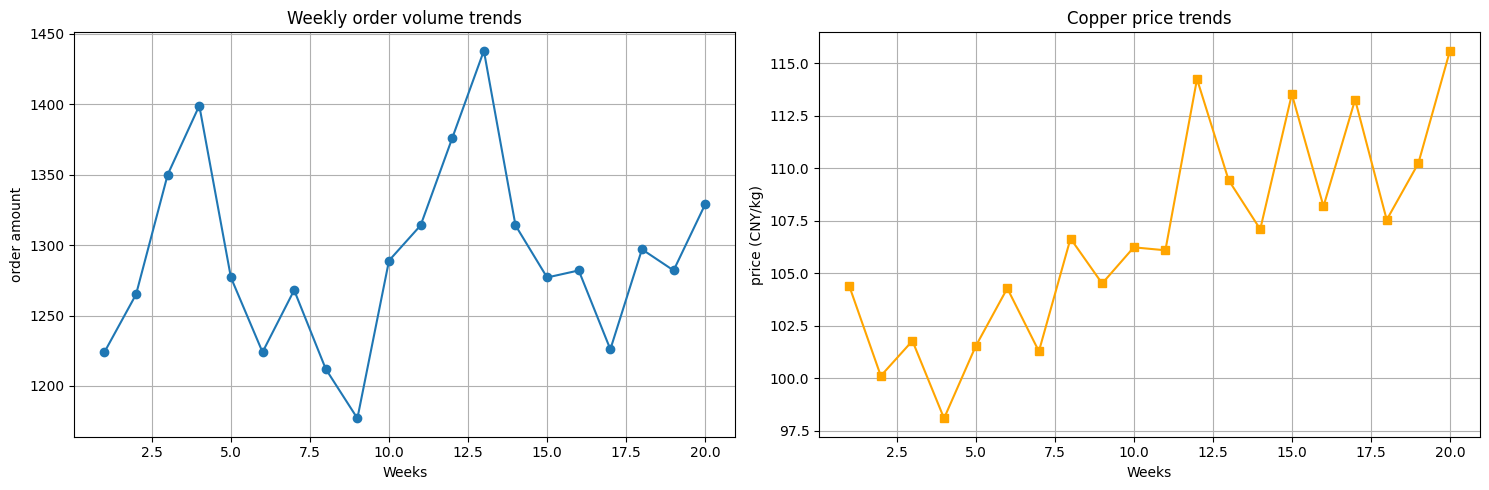

In [75]:
# Generated and display data
supply_data = generate_supply_chain_data()
print("=== 供应链数据概览 ===")
print(supply_data.head(10))

# 数据可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Set font family for all text elements in the plot
plt.rcParams['font.family'] = ['SimHei']

ax1.plot(supply_data['week'], supply_data['orders'], marker='o')
ax1.set_title('Weekly order volume trends')
ax1.set_xlabel('Weeks')
ax1.set_ylabel('order amount')
ax1.grid(True)

ax2.plot(supply_data['week'], supply_data['copper_price'], marker='s', color='orange')
ax2.set_title('Copper price trends')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('price (CNY/kg)')
ax2.grid(True)

plt.tight_layout()
plt.show()

### AI数据分析助手

In [76]:
class SupplyChainAnalyzer:
    def __init__(self, claude_client):
        self.client = claude_client

    def analyze_trend(self, data_summary):
        """趋势分析"""
        prompt = f"""
        作为数据分析专家，请分析以下供应链数据：

        {data_summary}

        请提供：
        1. 趋势识别（上升/下降/稳定）
        2. 异常值检测
        3. 可能的影响因素
        4. 风险评估
        5. actionable建议

        请用专业但易懂的语言回答。
        """
        return call_claude(prompt)

    def detect_anomalies(self, data_summary):
        """异常检测和预警"""
        prompt = f"""
        作为供应链风险管理专家，请分析以下数据中的异常情况：

        {data_summary}

        请识别：
        1. 异常数据点及其特征
        2. 异常的可能原因
        3. 风险等级评估
        4. 应对措施建议
        5. 预防措施

        以预警报告的格式输出。
        """
        return call_claude(prompt)

In [77]:
# 准备数据摘要
data_summary = f"""
过去20周的供应链关键指标：

订单量统计：
- 平均订单量：{supply_data['orders'].mean():.0f}
- 最高订单量：{supply_data['orders'].max():.0f} (第{supply_data.loc[supply_data['orders'].idxmax(), 'week']:.0f}周)
- 最低订单量：{supply_data['orders'].min():.0f} (第{supply_data.loc[supply_data['orders'].idxmin(), 'week']:.0f}周)
- 标准差：{supply_data['orders'].std():.0f}

铜价统计：
- 平均价格：{supply_data['copper_price'].mean():.2f} 元/kg
- 最高价格：{supply_data['copper_price'].max():.2f} 元/kg (第{supply_data.loc[supply_data['copper_price'].idxmax(), 'week']:.0f}周)
- 最低价格：{supply_data['copper_price'].min():.2f} 元/kg (第{supply_data.loc[supply_data['copper_price'].idxmin(), 'week']:.0f}周)
- 价格波动率：{supply_data['copper_price'].std():.2f}

近期数据：
{supply_data.tail(5).to_string()}
"""

In [78]:
# 初始化分析器
analyzer = SupplyChainAnalyzer(client)

print("=== AI趋势分析 ===")
trend_analysis = analyzer.analyze_trend(data_summary)
print(trend_analysis)

=== AI趋势分析 ===
基于提供的供应链数据，我将从多个维度进行分析：

1. 趋势识别
- 订单量：整体呈现相对稳定状态，波动范围在1177-1438之间，标准差65表明波动程度可控
- 铜价：呈现明显上升趋势，特别是最近几周，从第16周的108.18元/kg上升至第20周的115.59元/kg，涨幅显著

2. 异常值检测
- 订单量：第13周的1438单属于明显高峰，第9周的1177单属于明显低谷
- 铜价：最近第20周达到115.59元/kg的高点，显著高于平均水平，需要特别关注

3. 可能的影响因素
- 宏观经济：铜价上涨可能与全球经济复苏、通货膨胀预期有关
- 供需关系：订单量波动可能受季节性因素影响
- 市场竞争：订单量的稳定性表明市场份额相对稳固

4. 风险评估
高风险：
- 原材料成本压力持续上升
- 铜价波动率4.94显示价格波动风险较大
中等风险：
- 订单量波动可能影响生产计划稳定性
- 库存管理压力增加

5. Actionable建议

短期行动：
- 适当增加铜材库存，对冲近期价格上涨风险
- 与重要客户沟通可能的价格调整方案

中期策略：
- 优化采购策略，考虑签订更多长期供应合同
- 开发替代材料或优化产品设计，减少铜用量

长期规划：
- 建立更完善的价格风险管理机制
- 加强供应链韧性建设，增加供应商多样性

监控指标：
- 设立铜价预警机制（如价格超过120元/kg启动应急预案）
- 密切关注订单量与铜价相关性
- 每周跟踪库存周转率变化

这些分析和建议旨在帮助企业更好地应对供应链波动，确保业务持续稳定运营。建议根据实际情况进行适当调整和实施。


In [79]:
print("\n=== AI异常检测 ===")
anomaly_analysis = analyzer.detect_anomalies(data_summary)
print(anomaly_analysis)


=== AI异常检测 ===
# 供应链风险预警报告

## 一、异常情况识别

### 1.1 铜价异常
- 第20周铜价达到115.59元/kg，创20周新高
- 近3周铜价波动显著，呈现明显上涨趋势
- 最近5周内铜价波动范围：107.54-115.59元/kg，高于平均水平

### 1.2 订单量波动
- 第17周订单量下降至1226单，低于平均值1291单
- 订单量波动幅度在正常范围内（±1个标准差以内）

## 二、异常原因分析

### 2.1 铜价上涨可能原因
1. 大宗商品市场供需关系变化
2. 国际市场波动影响
3. 季节性需求增加
4. 上游供应链压力

### 2.2 订单波动可能原因
1. 正常的市场需求波动
2. 季节性因素影响
3. 客户采购策略调整

## 三、风险等级评估

- 整体风险等级：中等
- 铜价风险：高
- 订单量风险：低

风险影响：
1. 原材料成本上升影响利润率
2. 采购预算压力增大
3. 定价策略需要调整

## 四、应对措施建议

### 即时措施
1. 评估现有铜材库存，合理调配
2. 与供应商协商锁定部分采购价格
3. 适当提前采购，规避近期高价
4. 审查成本结构，必要时调整产品定价

### 中长期措施
1. 建立铜价走势预警机制
2. 开发多元化供应商渠道
3. 优化库存管理策略
4. 考虑签订长期供货协议

## 五、预防措施

1. 完善供应链风险监测系统
- 设置关键指标预警阈值
- 建立每日监测机制
- 定期分析市场趋势

2. 优化采购策略
- 实施战略性采购
- 建立价格对冲机制
- 维护供应商关系

3. 加强内部控制
- 提高库存管理效率
- 优化成本控制流程
- 加强预算管理

## 六、后续跟进建议

1. 每周跟踪铜价走势
2. 密切关注订单量变化
3. 定期评估应对措施效果
4. 及时调整风险管理策略

报告完成日期：2024-05-20
风险管理部门负责人：[待填写]


## 第四部分：智能报告生成系统

### 概念：自动化报告生成
将数据分析结果自动生成结构化的商务报告，节省大量手工整理时间。

In [80]:
class ReportGenerator:
    def __init__(self, claude_client):
        self.client = claude_client

    def generate_weekly_report(self, data_summary, analysis_results):
        """生成周报"""
        prompt = f"""
        作为供应链总监的助手，请基于以下信息生成专业的周报：

        数据概况：
        {data_summary}

        分析结果：
        {analysis_results}

        报告要求：
        1. 执行摘要（2-3句话）
        2. 关键指标表现
        3. 重要发现和洞察
        4. 风险提示
        5. 下周重点关注事项
        6. 推荐行动方案

        请以正式商务报告格式输出，使用清晰的段落结构。
        """
        return call_claude(prompt)

    def generate_supplier_evaluation(self, supplier_info):
        """供应商评估报告"""
        prompt = f"""
        作为采购专家，请基于以下信息生成供应商评估报告：

        {supplier_info}

        评估维度：
        1. 价格竞争力
        2. 质量稳定性
        3. 交货可靠性
        4. 财务健康度
        5. 合作配合度
        6. 风险因素

        请给出综合评分(1-10分)和详细评估意见。
        """
        return call_claude(prompt)


In [81]:
# 模拟供应商信息
supplier_info = """
供应商：ABC铜业有限公司

基本信息：
- 合作时长：3年
- 主要产品：铜材料、铜制品
- 月均供货量：500吨
- 平均交货期：15天

近期表现：
- 价格调整：过去6个月涨价8%
- 质量问题：无重大质量事故
- 交货准时率：95%
- 付款条件：净30天
- 响应速度：24小时内回复

财务状况：
- 年营收：2亿元
- 信用评级：AA-
- 现金流：良好

竞争对手对比：
- 价格水平：比市场平均高3%
- 质量水平：行业领先
- 服务水平：优秀
"""

In [82]:
# 生成报告
report_gen = ReportGenerator(client)

print("=== 供应链周报 ===")
weekly_report = report_gen.generate_weekly_report(data_summary, trend_analysis)
print(weekly_report)

=== 供应链周报 ===
# 供应链周报
**报告周期：** 第20周（截至2024年5月19日）  
**报告人：** 供应链分析团队  
**日期：** 2024年5月20日

## 执行摘要
本周供应链整体运行平稳，订单量达1329单，环比上升3.7%；但铜价持续攀升至115.59元/kg，创20周新高，对成本管控带来显著压力。建议立即启动原材料成本管控预案，并加强库存优化管理。

## 关键指标表现
| 指标 | 本周数据 | 环比变化 | 20周均值 | 状态 |
|------|----------|----------|-----------|------|
| 订单量 | 1329 | +3.7% | 1291 | ✅ |
| 铜价(元/kg) | 115.59 | +4.9% | 106.70 | ⚠️ |

## 重要发现和洞察
1. **订单趋势**
   - 近5周订单量保持稳定，波动范围在1226-1329之间
   - 本周订单量高于20周平均水平，显示需求稳健

2. **价格走势**
   - 铜价连续两周大幅上涨，累计涨幅达7.4%
   - 当前价格已显著高于20周平均水平(超出8.3%)

## 风险提示
1. **高度关注**
   - 原材料成本压力持续增大
   - 铜价波动率达4.94，显示市场不确定性增加

2. **持续监控**
   - 订单交付能力可能受到成本上涨影响
   - 库存价值波动风险加大

## 下周重点关注事项
1. 密切监控铜价走势，特别是是否突破120元/kg关口
2. 评估价格上涨对订单利润的影响
3. 跟踪重要客户订单变化情况
4. 监控库存水平及周转效率

## 推荐行动方案
### 即时行动（1周内）
- 召开紧急成本管控会议
- 与核心供应商沟通稳价措施
- 评估提前采购可能性

### 短期措施（1个月内）
- 优化库存结构，适度增加低价库存
- 制定价格调整方案
- 加强供应商渠道多元化

### 中期规划（3个月内）
- 研究替代材料方案
- 完善价格风险对冲机制
- 强化供应链韧性建设

---
**备注：** 本报告基于最新供应链数据编制，建议相关部门根据实际情况调整执行力度和优先级。


In [83]:
print("\n=== 供应商评估报告 ===")
supplier_report = report_gen.generate_supplier_evaluation(supplier_info)
print(supplier_report)


=== 供应商评估报告 ===
**供应商评估报告**

供应商名称：ABC铜业有限公司
评估日期：[当前日期]
综合评分：8.5/10

**详细评估分析：**

1. 价格竞争力：7.5分
- 虽高于市场平均3%，但考虑其产品质量和服务水平，性价比尚可
- 近期8%涨幅需关注，建议进行价格谈判
- 付款条件（净30天）较为合理

2. 质量稳定性：9分
- 无重大质量事故记录
- 行业领先的质量水平
- 质量管控体系完善

3. 交货可靠性：9分
- 95%的准时交货率表现优异
- 15天的交货周期符合行业标准
- 月均供货量稳定，供应能力有保障

4. 财务健康度：8.5分
- AA-信用评级显示财务状况稳健
- 2亿元年营收规模适中
- 良好的现金流保障供应稳定性

5. 合作配合度：9分
- 24小时响应速度优秀
- 3年合作经验表明双方有良好默契
- 服务水平评价优秀

6. 风险因素：7.5分
- 价格上涨趋势需警惕
- 对单一供应商依赖度较高
- 市场竞争加剧可能带来不确定性

**综合评估意见：**

ABC铜业作为战略供应商表现优异，建议继续保持合作关系。但建议：

1. 开展价格谈判，争取更优惠的采购条件
2. 适当发展备选供应商，降低依赖风险
3. 建立季度绩效回顾机制
4. 加强长期战略合作关系

**改进建议：**

1. 协商建立价格联动机制
2. 优化库存管理，提升供应链效率
3. 深化技术合作，推动产品创新
4. 建立更紧密的信息共享机制

**后续跟进重点：**

1. 密切监控价格变动
2. 持续跟踪质量表现
3. 定期评估财务状况
4. 维护良好合作关系

签署：[采购专家姓名]
部门：供应商管理部


## 第五部分：实战练习与互动

### 互动练习1：Prompt优化挑战

In [84]:
def prompt_optimization_challenge():
    """Prompt优化挑战"""

    scenario = """
    情景：你收到一份8D报告，需要AI帮你快速识别其中的问题点。

    8D报告内容摘要：
    - 问题描述：产品A出现表面划痕
    - 根本原因：操作员培训不足
    - 纠正措施：重新培训所有操作员
    - 预防措施：更新操作手册
    """

    print("挑战：请设计一个prompt来分析这份8D报告")
    print("情景：", scenario)
    print("\n请在下面代码块中写出你的prompt：")

    # 学员可以在这里写自己的prompt
    student_prompt = input("请输入你的prompt: ")

    # 专家级参考prompt
    expert_prompt = f"""
    作为质量管理专家，请深度分析以下8D报告的有效性：

    {scenario}

    分析要求：
    1. 问题定义的准确性和完整性
    2. 根因分析的逻辑性和深度
    3. 纠正措施的针对性和可执行性
    4. 预防措施的系统性和长期有效性
    5. 整体报告的严谨性评估

    请指出潜在的缺陷和改进建议，并给出1-10分的质量评分。
    """

    print("\n=== 你的Prompt结果 ===")
    student_result = call_claude(student_prompt)
    print(student_result)

    print("\n=== 专家级Prompt结果 ===")
    expert_result = call_claude(expert_prompt)
    print(expert_result)

    return student_prompt, expert_prompt

In [85]:
# 运行挑战（注释掉input部分用于演示）
# prompt_optimization_challenge()

# 演示版本
demo_student_prompt = "分析这个8D报告有什么问题"
demo_expert_prompt = """
作为质量管理专家，请深度分析以下8D报告的有效性：

8D报告内容摘要：
- 问题描述：产品A出现表面划痕
- 根本原因：操作员培训不足
- 纠正措施：重新培训所有操作员
- 预防措施：更新操作手册

分析要求：
1. 问题定义的准确性和完整性
2. 根因分析的逻辑性和深度
3. 纠正措施的针对性和可执行性
4. 预防措施的系统性和长期有效性
5. 整体报告的严谨性评估

请指出潜在的缺陷和改进建议，并给出1-10分的质量评分。
"""

print("=== Prompt对比演示 ===")
print("学员Prompt：", demo_student_prompt)
student_demo_result = call_claude(demo_student_prompt)
print("结果：", student_demo_result[:200] + "...")

print("\n专家Prompt结果：")
expert_demo_result = call_claude(demo_expert_prompt)
print(expert_demo_result[:300] + "...")

=== Prompt对比演示 ===
学员Prompt： 分析这个8D报告有什么问题
结果： 我没有看到任何8D报告。请您发送8D报告,这样我才能帮您分析其中可能存在的问题。如果您愿意分享,我可以从以下几个方面来评估该报告:

1. 团队成员的组成是否合适
2. 问题描述是否清晰具体
3. 临时措施是否有效
4. 根本原因分析是否深入
5. 纠正措施是否适当
6. 预防措施是否到位
7. 验证效果是否可靠
8. 经验教训总结是否充分

请将8D报告分享给我,我会仔细分析并提出改进建议。...

专家Prompt结果：
以下是对该8D报告的深度分析：

一、问题定义分析（5分）
缺陷：
- 未详细说明划痕的具体特征（长度、深度、位置等）
- 未量化问题发生频率和影响范围
- 缺少问题发现时间、批次信息等关键数据

改进建议：
- 添加详细的问题描述参数和标准
- 提供具体的不良率数据
- 补充问题对客户影响的评估

二、根因分析（4分）
缺陷：
- "操作员培训不足"过于表面和笼统
- 缺少系统性分析工具（如5Why、鱼骨图等）的应用
- 未考虑其他潜在因素（如工装、工艺等）

改进建议：
- 运用结构化分析工具深入挖掘
- 从人机料法环等多维度分析
- 提供具体的证据支持根因结论

三、纠正措施（5分）
缺...


### 互动练习2：个人Prompt模板库构建

In [86]:
# 个人Prompt模板库
personal_prompt_library = {
    "邮件总结": """
作为供应链专员，请总结以下邮件：

邮件内容：{email_content}

输出格式：
- 主题：
- 关键信息：
- 时间节点：
- 需要行动：
- 紧急程度：
""",

    "数据异常分析": """
作为数据分析专家，请分析以下供应链数据异常：

数据：{data}
异常值：{anomaly}

请分析：
1. 异常特征描述
2. 可能原因（至少3个）
3. 影响评估
4. 建议措施
""",

    "供应商谈判准备": """
作为采购谈判专家，请帮我准备与供应商的谈判：

供应商：{supplier_name}
谈判议题：{topic}
我方目标：{target}
市场情况：{market_info}

请提供：
1. 谈判策略
2. 关键论据
3. 预期阻力和应对
4. 备选方案
""",

    "风险评估": """
作为供应链风险管理专家，请评估以下情况的风险：

情况描述：{situation}
涉及供应商：{suppliers}
影响产品：{products}

评估维度：
1. 风险等级（高/中/低）
2. 影响范围
3. 可能损失
4. 应对措施
5. 监控指标
"""
}

In [87]:
def use_template(template_name, **kwargs):
    """使用模板生成prompt"""
    if template_name in personal_prompt_library:
        template = personal_prompt_library[template_name]
        filled_prompt = template.format(**kwargs)
        return call_claude(filled_prompt)
    else:
        return "模板不存在"

# 演示模板使用
print("=== 个人模板库演示 ===")
print("可用模板：", list(personal_prompt_library.keys()))

# 使用邮件总结模板
email_summary_result = use_template(
    "邮件总结",
    email_content="供应商通知下月起铜材料涨价8%，希望我们理解并确认是否接受新价格。"
)
print("\n邮件总结结果：")
print(email_summary_result)

# 使用风险评估模板
risk_assessment_result = use_template(
    "风险评估",
    situation="主要铜材料供应商可能因环保问题停产2个月",
    suppliers="ABC铜业（主供应商，占比60%）",
    products="电子连接器、线缆产品"
)
print("\n风险评估结果：")
print(risk_assessment_result)

=== 个人模板库演示 ===
可用模板： ['邮件总结', '数据异常分析', '供应商谈判准备', '风险评估']

邮件总结结果：

- 主题：供应商铜材料价格调整通知

- 关键信息：
  * 铜材料价格上调8%
  * 供应商要求确认新价格

- 时间节点：
  * 价格调整生效时间：下月起

- 需要行动：
  * 评估价格调整的影响
  * 向供应商回复是否接受新价格
  * 如需议价，及时与供应商沟通

- 紧急程度：中等
  * 需在本月内完成价格确认
  * 涉及成本变动，需及时处理

风险评估结果：
作为供应链风险管理专家，我将从以下几个维度进行分析评估：

1. 风险等级：高风险
理由：
- 供应商集中度高(60%)
- 停产时间较长(2个月)
- 铜材料为关键原材料
- 影响终端产品生产连续性

2. 影响范围：
- 直接影响：
  * 电子连接器、线缆产品生产计划
  * 库存水平
  * 交付时间
- 间接影响：
  * 客户订单履约
  * 公司声誉
  * 市场份额

3. 可能损失：
- 财务损失：
  * 原材料采购成本上升(备选供应商价格可能更高)
  * 产能利用率下降导致的效率损失
  * 可能的违约赔偿
- 非财务损失：
  * 客户关系受损
  * 市场信誉影响
  * 员工工时损失

4. 应对措施：
立即行动：
- 评估现有库存水平,制定库存调配计划
- 启动备选供应商资源
- 与ABC铜业沟通具体停产计划和恢复时间表

中期措施：
- 寻找并认证新的合格供应商
- 优化供应商结构,降低单一依赖
- 调整生产计划,优先保障重要客户订单
- 与客户沟通可能的交期调整

长期策略：
- 建立供应商分级管理机制
- 完善供应商风险评估体系
- 建立战略库存管理制度
- 优化产品设计,考虑材料替代方案

5. 监控指标：
关键指标：
- 库存水平监控
- 替代供应商产能和交付能力
- 订单履约率
- 材料成本变动
- 客户满意度

预警指标：
- 供应商库存水平
- 原材料市场价格波动
- 客户订单变化
- 生产计划完成率

建议设立专项应急小组,定期追踪以上指标,确保风险可控。同时完善应急预案,提高供应链韧性。


## 课程总结与下一步规划

### 今天学到的核心技能

In [88]:
# 总结今天的学习成果
learning_summary = {
    "Prompt Engineering": {
        "概念": "与AI有效沟通的技能",
        "核心要素": ["角色定位", "任务明确", "上下文丰富", "输出结构"],
        "实践价值": "提高AI回答质量和准确性"
    },

    "邮件自动化": {
        "功能": ["智能总结", "自动回复", "语调调整"],
        "效果": "节省80%的邮件处理时间"
    },

    "数据分析": {
        "应用": ["趋势识别", "异常检测", "风险评估"],
        "价值": "数据驱动的决策支持"
    },

    "报告生成": {
        "类型": ["周报", "供应商评估", "风险报告"],
        "优势": "结构化、专业性、效率高"
    },

    "个人工具库": {
        "组成": "常用Prompt模板集合",
        "目标": "快速复用，提高工作效率"
    }
}

for category, details in learning_summary.items():
    print(f"\n【{category}】")
    for key, value in details.items():
        print(f"  {key}: {value}")


【Prompt Engineering】
  概念: 与AI有效沟通的技能
  核心要素: ['角色定位', '任务明确', '上下文丰富', '输出结构']
  实践价值: 提高AI回答质量和准确性

【邮件自动化】
  功能: ['智能总结', '自动回复', '语调调整']
  效果: 节省80%的邮件处理时间

【数据分析】
  应用: ['趋势识别', '异常检测', '风险评估']
  价值: 数据驱动的决策支持

【报告生成】
  类型: ['周报', '供应商评估', '风险报告']
  优势: 结构化、专业性、效率高

【个人工具库】
  组成: 常用Prompt模板集合
  目标: 快速复用，提高工作效率


### 课后作业和下一步规划

In [89]:
homework_and_next_steps = """
【本周作业】
1. 完成3个实际工作邮件的AI处理练习
2. 用AI分析一组真实的工作数据（订单、价格、质量等）
3. 建立个人Prompt模板库（包含5-10个常用场景）
4. 尝试用AI生成一份工作报告

【1个月学习规划】
- 第2周：Python基础语法，数据处理入门
- 第3周：API集成，自动化工作流
- 第4周：高级分析技巧，预测模型基础

【3个月目标】
- 建立完整的AI工作助手系统
- 实现供应链关键环节的自动化
- 掌握基本的数据科学技能

【推荐资源】
1. Anthropic Claude文档
2. Python数据分析教程
3. 供应链管理在线课程
4. GitHub开源项目参考
"""

print(homework_and_next_steps)


【本周作业】
1. 完成3个实际工作邮件的AI处理练习
2. 用AI分析一组真实的工作数据（订单、价格、质量等）
3. 建立个人Prompt模板库（包含5-10个常用场景）
4. 尝试用AI生成一份工作报告

【1个月学习规划】
- 第2周：Python基础语法，数据处理入门
- 第3周：API集成，自动化工作流
- 第4周：高级分析技巧，预测模型基础

【3个月目标】
- 建立完整的AI工作助手系统
- 实现供应链关键环节的自动化
- 掌握基本的数据科学技能

【推荐资源】
1. Anthropic Claude文档
2. Python数据分析教程
3. 供应链管理在线课程
4. GitHub开源项目参考



### 个人学习计划制定


In [90]:
def create_personal_plan():
    """帮助制定个人学习计划"""

    planning_prompt = """
    作为AI学习规划师，请帮Josie制定个人化的学习计划：

    背景信息：
    - 职业：供应链管理
    - 编程基础：零基础
    - 学习目标：将AI应用到日常工作
    - 时间投入：每周5-8小时
    - 优先需求：邮件处理、数据分析、报告生成

    请提供：
    1. 4周详细学习计划
    2. 每周具体学习目标和任务
    3. 推荐的学习资源
    4. 实践项目建议
    5. 进度评估方法

    计划要实用、可执行、循序渐进。
    """

    personal_plan = call_claude(planning_prompt)
    return personal_plan

print("=== 个人学习计划 ===")
plan = create_personal_plan()
print(plan)

print("\n" + "="*50)
print("恭喜完成AI供应链管理工具入门课程！")
print("记住：AI是工具，关键是学会提出正确的问题。")
print("继续练习，你很快就能成为AI驱动的供应链专家！")

=== 个人学习计划 ===
基于您的背景和需求，我为您制定了一个循序渐进的4周学习计划：

第1周：AI基础认知与邮件处理
- 学习目标：
  * 了解AI基础概念
  * 掌握ChatGPT基本使用
  * 学习AI辅助邮件处理
- 具体任务：
  * 观看AI入门视频 (2小时)
  * 注册并熟悉ChatGPT (2小时)
  * 练习用AI优化邮件写作 (3小时)
- 实践项目：
  * 用AI处理5封工作邮件
  * 创建邮件模板库

第2周：数据分析基础
- 学习目标：
  * 学习Excel与AI结合
  * 掌握基础数据处理
- 具体任务：
  * 学习Excel数据分析功能 (3小时)
  * 练习用AI生成Excel公式 (2小时)
  * 数据可视化基础 (3小时)
- 实践项目：
  * 处理一份供应链数据
  * 生成数据分析图表

第3周：报告生成与优化
- 学习目标：
  * 掌握AI辅助报告写作
  * 学习数据可视化展示
- 具体任务：
  * 学习报告结构设计 (2小时)
  * 练习用AI生成报告 (3小时)
  * 报告美化与排版 (3小时)
- 实践项目：
  * 完成一份供应链月度报告

第4周：工作流程自动化
- 学习目标：
  * 整合AI到日常工作
  * 建立个性化工作流
- 具体任务：
  * 学习常用AI工具集成 (3小时)
  * 工作流程优化 (3小时)
  * 总结与复习 (2小时)
- 实践项目：
  * 设计个人AI工作流程
  * 完成一个完整的项目

推荐学习资源：
1. ChatGPT官方教程
2. LinkedIn Learning的Excel课程
3. Coursera的数据分析入门课程
4. YouTube上的AI应用教学视频

进度评估方法：
1. 周任务完成检查表
2. 实践项目成果评估
3. 工作效率提升测量
4. 每周学习总结记录

建议：
1. 建立学习笔记系统
2. 保存常用AI提示词
3. 多实践、多应用
4. 与同事分享学习成果

需要调整或有任何问题都可以随时提出，祝学习顺利！

恭喜完成AI供应链管理工具入门课程！
记住：AI是工具，关键是学会提出正确的问题。
继续练习，你很快就能成为AI驱动的供应链专家！


## 附录：常用代码模板

### Claude API调用模板

```python
# 基础调用模板
def claude_call_template(system_message, user_message, max_tokens=1000):
    """标准Claude API调用模板"""
    try:
        message = client.messages.create(
            model="claude-3-sonnet-20240229",
            max_tokens=max_tokens,
            system=system_message,
            messages=[{"role": "user", "content": user_message}]
        )
        return message.content[0].text
    except Exception as e:
        return f"API调用失败: {str(e)}"

# 使用示例
system_msg = "你是专业的供应链顾问"
user_msg = "请分析铜价上涨对电子制造业的影响"
result = claude_call_template(system_msg, user_msg)
print("API调用结果：", result[:100] + "...")
```

### 数据可视化模板

```python
def create_supply_chain_dashboard(data):
    """创建供应链数据看板"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 订单趋势
    axes[0,0].plot(data['week'], data['orders'], marker='o')
    axes[0,0].set_title('订单量趋势')
    axes[0,0].grid(True)
    
    # 价格变化
    axes[0,1].plot(data['week'], data['copper_price'], marker='s', color='orange')
    axes[0,1].set_title('铜价变化')
    axes[0,1].grid(True)
    
    # 订单分布
    axes[1,0].hist(data['orders'], bins=10, alpha=0.7, color='skyblue')
    axes[1,0].set_title('订单量分布')
    
    # 价格分布
    axes[1,1].hist(data['copper_price'], bins=10, alpha=0.7, color='lightcoral')
    axes[1,1].set_title('价格分布')
    
    plt.tight_layout()
    plt.show()

# 创建看板
create_supply_chain_dashboard(supply_data)
```